# 한국 금거래소 크롤링

In [1]:
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
import time

In [2]:
browser = webdriver.Chrome('C:/Users/admin/realproject/chromedriver.exe')
url = 'https://www.koreagoldx.co.kr/main/html.php?agencyCode=&htmid=goods/gold_list.html'
browser.get(url)

In [3]:
allbtn="#contents > div.sub_content > div > div.service_cont > div.clear > ul.graph_dt_buttons > li:nth-child(6) > label"
abtn=browser.find_element_by_css_selector(allbtn)
abtn.click()

### 한개 페이지만 추출 & 페이지 이동

In [4]:
dataset=browser.find_element_by_class_name("tabulator-tableHolder")

In [49]:
alist=dataset.text.split('\n')

In [50]:
alist[0]

'2021.06.11293,000272,000195,900151,000'

In [49]:
#example-table > div.tabulator-footer > span > button:nth-child(4)
nextbtn = browser.find_element_by_css_selector('#example-table > div.tabulator-footer > span > button:nth-child(4)')

In [50]:
nextbtn.click()

## 전체 페이지 크롤링하기 
< 페이지마다 반복 >  
1. 페이지의 TABLE읽어오기
2. NEXT버튼 누르기

### 방법1
- 이렇게 읽으면 텍스트 형식으로 읽어져서 데이터들을 분리하는 데 힘듬 

In [5]:
import numpy as np

In [6]:
pagenum=269

In [7]:
alllist=[]
for btn in range(pagenum+1):
    dataset=browser.find_element_by_class_name("tabulator-table")
    nextbtn = browser.find_element_by_css_selector('#example-table > div.tabulator-footer > span > button:nth-child(4)')
    nextbtn.click()
    time.sleep(1)
    alist=dataset.text.split('\n')
    alllist.append(alist)

In [76]:
arr=sum(alllist, []) #alllist를 n*1의 배열로 만들어주기

In [116]:
arr[:10]

['2021.05.25293000273000196600151600',
 '2021.05.24295000274000197300152100',
 '2021.05.22295000274000197300152100',
 '2021.05.21293000273500197000151800',
 '2021.05.20295000273500197000151800',
 '2021.05.19293000272500196200151300',
 '2021.05.18293000272500196200151300',
 '2021.05.17292000272000195900151000',
 '2021.05.15289000268000193000148800',
 '2021.05.14288000267000192300148200']

In [78]:
golddf=pd.DataFrame(columns=['date','buy','sell_24k','sell_18k','sell_14k'])
golddf

,date,buy,sell_24k,sell_18k,sell_14k


In [79]:
from datetime import datetime
# DATAFRAME에 데이터 저장해주기
for i in range(len(arr)):
    arr[i]=arr[i].replace(',',"")
    day=datetime.strptime(arr[i][:10], '%Y.%m.%d')
    golddf=golddf.append({'date': day ,'buy': int(arr[i][10:16]), 'sell_24k':int(arr[i][16:22]), 'sell_18k':int(arr[i][22:28]) , 'sell_14k': int(arr[i][28:])}, ignore_index=True  )

In [95]:
golddf[['buy','sell_24k','sell_18k','sell_14k']] = golddf[['buy','sell_24k','sell_18k','sell_14k']].astype('int')

In [101]:
golddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4035 entries, 0 to 4034
Data columns (total 5 columns):
date        4035 non-null datetime64[ns]
buy         4035 non-null int32
sell_24k    4035 non-null int32
sell_18k    4035 non-null int32
sell_14k    4035 non-null int32
dtypes: datetime64[ns](1), int32(4)
memory usage: 94.7 KB


In [114]:
golddf.tail(10)

,date,buy,sell_24k,sell_18k,sell_14k
4025,2008-03-24,122210,946007,804561,35
4026,2008-03-21,123420,957007,895261,745
4027,2008-03-20,125620,977008,60263,36
4028,2008-03-19,131780,103300,852226,6649
4029,2008-03-18,136840,106400,877806,8649
4030,2008-03-17,138050,107500,886876,9359
4031,2008-03-15,133650,106000,874506,8391
4032,2008-03-14,130020,102000,841506,5810
4033,2008-03-13,128370,100500,829126,4842
4034,2008-03-12,125180,976008,52062,971


In [103]:
golddf.head(5)

,date,buy,sell_24k,sell_18k,sell_14k
0,2021-05-25,293000,273000,196600,151600
1,2021-05-24,295000,274000,197300,152100
2,2021-05-22,295000,274000,197300,152100
3,2021-05-21,293000,273500,197000,151800
4,2021-05-20,295000,273500,197000,151800


## 방법 2

In [125]:
browser = webdriver.Chrome('C:/Users/admin/realproject/chromedriver.exe')
url = 'https://www.koreagoldx.co.kr/main/html.php?agencyCode=&htmid=goods/gold_list.html'
browser.get(url)

In [126]:
allbtn="#contents > div.sub_content > div > div.service_cont > div.clear > ul.graph_dt_buttons > li:nth-child(6) > label"
abtn=browser.find_element_by_css_selector(allbtn)
abtn.click()

In [127]:
html = browser.page_source

In [128]:
soup = BeautifulSoup(html, 'html.parser')

In [129]:
pagelen=269

In [130]:
gold = []
for j in range(pagelen+1):
        gold_list = soup.select('div.tabulator-cell')
        lg = [gold_list[i].text for i in range(len(gold_list))] 
        gold.append(lg)
        nextbtn = browser.find_element_by_css_selector('#example-table > div.tabulator-footer > span > button:nth-child(4)')
        nextbtn.click()
        time.sleep(1)
        html = browser.page_source
        soup = BeautifulSoup(html, 'html.parser')

In [171]:
temp=sum(gold,[])

In [172]:
real=np.array(temp).reshape(-1,5)

In [173]:
df=pd.DataFrame(real,columns=['date','buy','sell_24k','sell_18k','sell_14k'])

In [174]:
df.head()

,date,buy,sell_24k,sell_18k,sell_14k
0,2021.06.11,"293,000","272,000","195,900","151,000"
1,2021.06.10,"292,000","272,000","195,900","151,000"
2,2021.06.09,"293,000","272,500","196,200","151,300"
3,2021.06.08,"293,000","274,000","197,300","152,100"
4,2021.06.07,"292,000","273,500","197,000","151,800"


#### 현재 전부 다 object형식이므로 date: 날짜, 나머지는 int로 바꿔줘야함

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 5 columns):
date        4040 non-null object
buy         4040 non-null object
sell_24k    4040 non-null object
sell_18k    4040 non-null object
sell_14k    4040 non-null object
dtypes: object(5)
memory usage: 157.9+ KB


In [176]:
# , 제거
removecomma=lambda x: x.replace(',','')

In [177]:
df[['buy','sell_24k','sell_18k','sell_14k']] = df[['buy','sell_24k','sell_18k','sell_14k']].applymap(removecomma)

In [178]:
df.head()

,date,buy,sell_24k,sell_18k,sell_14k
0,2021.06.11,293000,272000,195900,151000
1,2021.06.10,292000,272000,195900,151000
2,2021.06.09,293000,272500,196200,151300
3,2021.06.08,293000,274000,197300,152100
4,2021.06.07,292000,273500,197000,151800


In [179]:
# int형으로 바꿔주기
df[['buy','sell_24k','sell_18k','sell_14k']] = df[['buy','sell_24k','sell_18k','sell_14k']].astype('int')

In [180]:
df.info() # int32로 바뀐거 볼 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 5 columns):
date        4040 non-null object
buy         4040 non-null int32
sell_24k    4040 non-null int32
sell_18k    4040 non-null int32
sell_14k    4040 non-null int32
dtypes: int32(4), object(1)
memory usage: 94.8+ KB


#### date 바꾸기

In [185]:
df['date'] = [datetime.strptime(date, '%Y.%m.%d') for date in df['date']]

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 5 columns):
date        4040 non-null datetime64[ns]
buy         4040 non-null int32
sell_24k    4040 non-null int32
sell_18k    4040 non-null int32
sell_14k    4040 non-null int32
dtypes: datetime64[ns](1), int32(4)
memory usage: 94.8 KB


## 시각화

In [187]:
import matplotlib.pyplot as plt

In [188]:
df['sell_24k']

0       272000
1       272000
2       272500
3       274000
4       273500
         ...  
4035    107500
4036    106000
4037    102000
4038    100500
4039     97600
Name: sell_24k, Length: 4040, dtype: int32

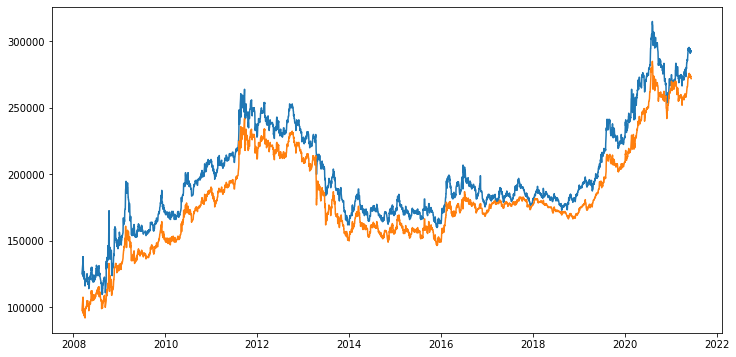

In [189]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(df.date, df['buy'])
ax.plot(df.date, df['sell_24k'])
plt.show()